In [1]:
import os

In [2]:
os.chdir("../")

In [3]:
import pandas as pd
from src.logs import log_message

In [5]:
df = pd.read_csv('artifacts/transformed_data.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


In [7]:
df.shape

(1359, 12)

In [9]:
df.isnull().sum().sum()

np.int64(0)

In [11]:
numeric_columns = df.select_dtypes(include=['number']).columns
numeric_columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid')

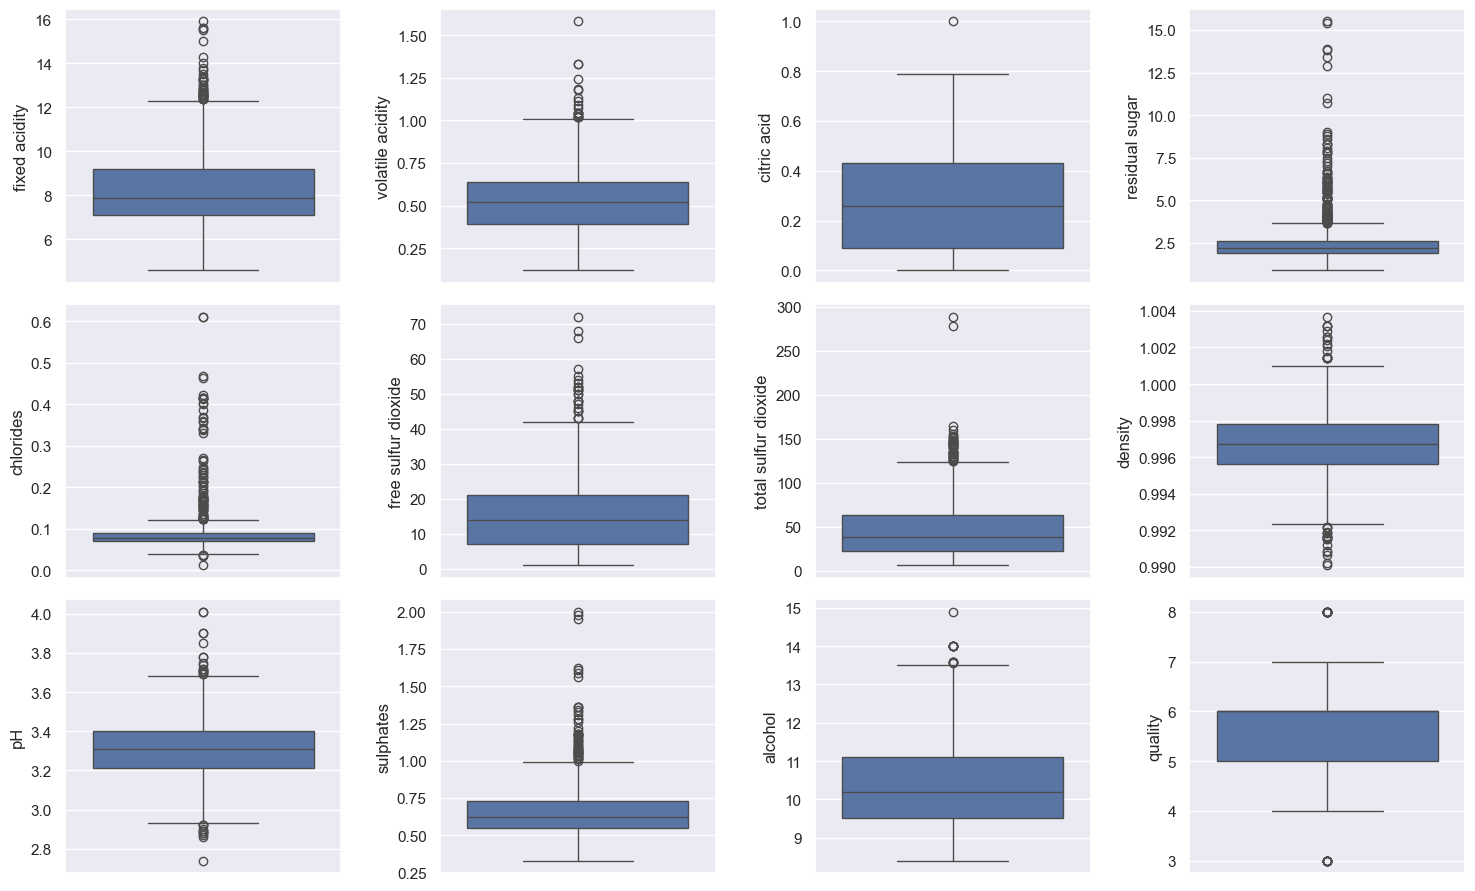

In [17]:
f,a=plt.subplots(3,4,figsize=(15,9),dpi=100)
ind=0

for i in range(3):
    for j in range(4):
        sns.boxplot(y=df[numeric_columns[ind]],ax=a[i,j])
        ind+=1
plt.tight_layout()
plt.show()

In [27]:
df_capped = df.copy() 
numeric_cols = df.select_dtypes(include=['number']).columns

for col in numeric_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_capped[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

In [28]:
num_col = df_capped.columns

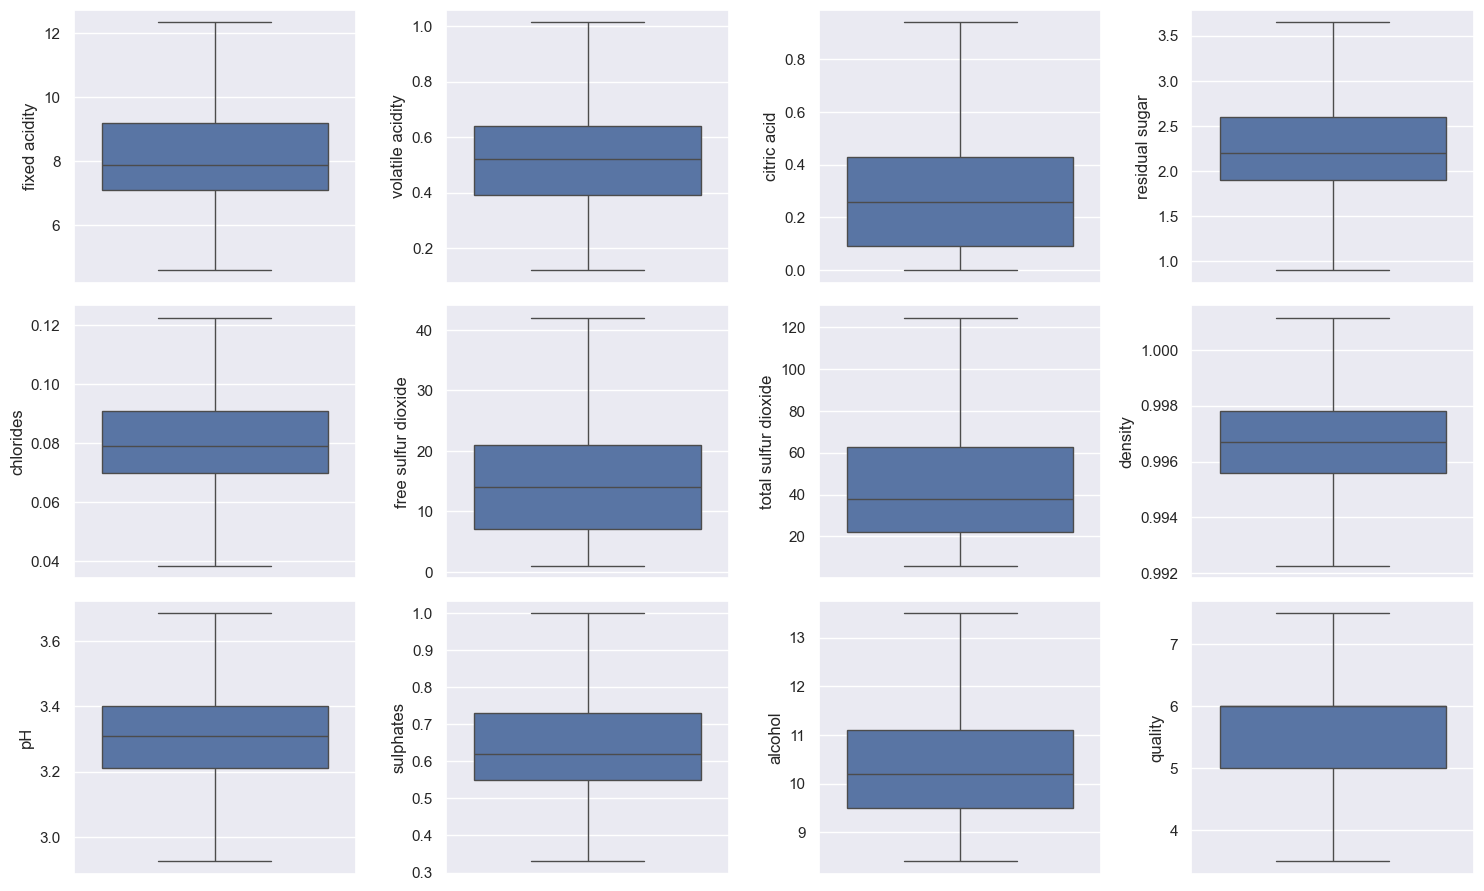

In [29]:
f,a=plt.subplots(3,4,figsize=(15,9),dpi=100)
ind=0

for i in range(3):
    for j in range(4):
        sns.boxplot(y=df_capped[num_col[ind]],ax=a[i,j])
        ind+=1
plt.tight_layout()
plt.show()

In [30]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [31]:
df_capped.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.284069,0.527840,0.272288,2.324099,0.081323,15.714496,46.092715,0.996707,3.308889,0.649963,10.428734,5.620677
std,1.658319,0.177262,0.195379,0.607558,0.018486,9.852641,30.877994,0.001798,0.149982,0.137403,1.070647,0.796351
min,4.600000,0.120000,0.000000,0.900000,0.038500,1.000000,6.000000,0.992270,2.925000,0.330000,8.400000,3.500000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,12.350000,1.015000,0.940000,3.650000,0.122500,42.000000,124.500000,1.001150,3.685000,1.000000,13.500000,7.500000


In [ ]:
import pickle


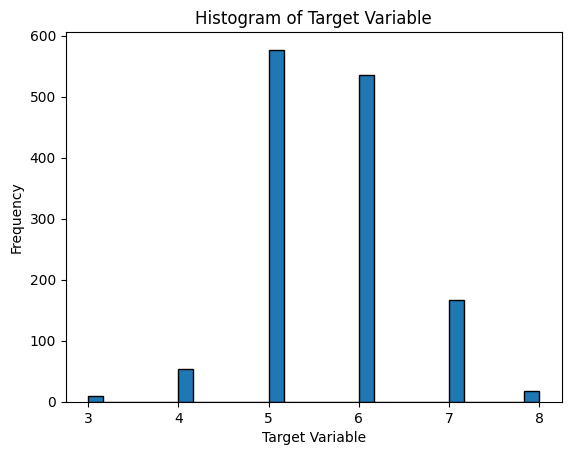

In [13]:
import matplotlib.pyplot as plt

plt.hist(df['quality'], bins=30, edgecolor="black")
plt.xlabel("Target Variable")
plt.ylabel("Frequency")
plt.title("Histogram of Target Variable")
plt.show()


In [32]:
X = df_capped.drop('quality',axis=1)
y = df_capped['quality']

In [33]:
X.shape

(1359, 11)

In [34]:
y.shape

(1359,)

In [38]:
X_numeric_cols = X.select_dtypes(include=['number']).columns

In [35]:
from sklearn.preprocessing import StandardScaler

In [39]:
scaler = StandardScaler()

X_scaled = X.copy()
X_scaled[X_numeric_cols] = scaler.fit_transform(X_scaled[X_numeric_cols])

In [43]:
X_scaled.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.533308,0.971576,-1.394157,-0.698296,-0.288078,-0.478677,-0.391773,0.608506,1.341398,-0.654981,-0.961207
1,-0.292011,1.987398,-1.394157,0.454283,0.902462,0.942785,0.677343,0.051991,-0.726282,0.218684,-0.587463
2,-0.292011,1.310183,-1.189351,-0.039679,0.577769,-0.072545,0.256176,0.163294,-0.326086,0.000268,-0.587463
3,1.759013,-1.398676,1.473125,-0.698296,-0.342194,0.130521,0.450560,0.719809,-0.993080,-0.509370,-0.587463
4,-0.533308,0.745837,-1.394157,-0.862950,-0.342194,-0.275611,-0.197388,0.608506,1.341398,-0.654981,-0.961207
5,-0.231687,0.407230,-1.086948,-1.192258,-0.666887,-0.072545,0.418163,-0.170615,-0.059288,-1.383034,-0.961207
6,-0.593632,0.689403,-1.394157,-1.850874,-0.883348,-0.072545,-0.812940,-1.172342,0.541006,-1.310229,-0.400592
7,-0.292011,0.294361,-1.291754,-0.533642,-0.450425,-0.681743,-0.910132,0.051991,0.340908,-0.582175,-0.867771
8,-0.472984,-0.157116,0.449096,2.183151,-0.558656,0.130521,1.811253,0.608506,0.274209,1.092348,0.066588
9,-0.955578,0.294361,-0.984545,-0.862950,0.848347,-0.072545,0.612548,-0.448873,-0.192687,-0.800591,-1.148078


In [47]:
print(y.value_counts())

quality
5.0    577
6.0    535
7.0    167
4.0     53
7.5     17
3.5     10
Name: count, dtype: int64


In [48]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1359 entries, 0 to 1358
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
dtypes: float64(11)
memory usage: 116.9 KB


In [49]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1359 entries, 0 to 1358
Series name: quality
Non-Null Count  Dtype  
--------------  -----  
1359 non-null   float64
dtypes: float64(1)
memory usage: 10.7 KB


In [50]:
from sklearn.model_selection import train_test_split

In [67]:
df_scaled =pd.concat([X_scaled,y],axis=1)
df_scaled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.533308,0.971576,-1.394157,-0.698296,-0.288078,-0.478677,-0.391773,0.608506,1.341398,-0.654981,-0.961207,5.0
1,-0.292011,1.987398,-1.394157,0.454283,0.902462,0.942785,0.677343,0.051991,-0.726282,0.218684,-0.587463,5.0
2,-0.292011,1.310183,-1.189351,-0.039679,0.577769,-0.072545,0.256176,0.163294,-0.326086,0.000268,-0.587463,5.0
3,1.759013,-1.398676,1.473125,-0.698296,-0.342194,0.130521,0.450560,0.719809,-0.993080,-0.509370,-0.587463,6.0
4,-0.533308,0.745837,-1.394157,-0.862950,-0.342194,-0.275611,-0.197388,0.608506,1.341398,-0.654981,-0.961207,5.0


In [69]:
df_scaled.shape

(1359, 12)

In [72]:
train,test = train_test_split(df_scaled,test_size=0.25,random_state=101)

In [76]:
train.shape

(1019, 12)

In [74]:
test.shape

(340, 12)

In [78]:
# handling outliers
def preprocessing(df):
    df_capped = df.copy() 
    numeric_cols = df.select_dtypes(include=['number']).columns

    log_message("Outliers are Handling using IQR method.....")

    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df_capped[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
    
    log_message("Completed the Outlier Handling.....")

    X = df_capped.drop('quality',axis=1)
    y = df_capped['quality']

    X_numeric_cols = X.select_dtypes(include=['number']).columns

    scaler = StandardScaler()

    X_scaled = X.copy()
    X_scaled[X_numeric_cols] = scaler.fit_transform(X_scaled[X_numeric_cols])

    log_message("Scaling is done using StandardScaler method")

    df_scaled =pd.concat([X_scaled,y],axis=1)

    with open("models/scaler.pkl", "wb") as f:
        pickle.dump(scaler, f)
    
    log_message("Saving the Scaler Model.")
    
    train,test = train_test_split(df_scaled,test_size=0.25,random_state=101)
    log_message("Splitting the train and test data in the ratio of 3:1")

    os.makedirs("artifacts", exist_ok=True)
    train.to_csv("artifacts/train.csv", index=False)
    test.to_csv("artifacts/test.csv", index=False)
    log_message('Train and Test data is saved')
    
    return train,test